In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import mglearn

## 3.3 预处理与缩放
一些算法对数据缩放非常敏感。因此，通常的做法是对特征进行调节，使数据表示更适合于这些算法。通常来说，这是对数据的一种简单的按特征的缩放和移动：

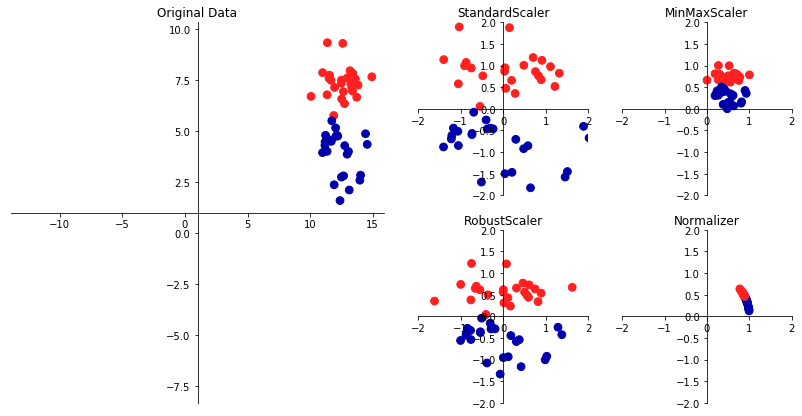

In [2]:
mglearn.plots.plot_scaling()
plt.gcf().set_size_inches(14, 7)
plt.show()

### 3.3.1 不同类型的预处理
上图中，第1张图显示的是一个模拟的有两个特征的二分类数据集。第一个特征位于10~15、第二个特征位于1～9。

接下来的4张图展示了4种数据变换方法：
1. `StandardScaler`: 确保每个特征的平均值为0、方差为1，使所有特征都位于同一量级。但这种缩放不能保证特征任何特定的最大值和最小值
2. `RobustScaler`: 原理与`StandardScaler`类似，确保每个特征的统计属性都位于同一范围。但`RobustScaler`使用的是中位数和四分位数，而不是平均值和方差。这样`RobustScaler`会忽略与其他点有很大不同的数据点(比如测量误差)。这些与众不同的数据点也叫异常值（outlier），可能会给其他缩放方法造成麻烦
3. `MinMaxScaler`: 移动数据，使所有特征都刚好位于0到1之间
4. `Normalizer`: 用到一种完全不同的缩放方法。它对每个数据点进行缩放，使得特征向量的欧式长度等于 1。换句话说，它将一个数据点投射到半径为 1 的圆上（对于更高维度的情况，是球面）。这意味着每个数据点的缩放比例都不相同（乘以其长度的倒数）。如果只有数据的方向（或角度）是重要的，而特征向量的长度无关紧要，那么通常会使用这种归一化

### 3.3.2 应用数据变换
我们将使用`cancer数据集`。通常在应用监督学习算法之前使用预处理方法。

以下代码中，我们要将核SVM(SVC)应用在`cancer数据集`上，并使用`MinMaxScaler`预处理数据：
1. 导入实现预处理的类，然后将其实例化
2. 使用`fit`方法拟合缩放器（scaler），并将其应用于训练数据

值得注意的是，与第2章中的分类器和回归器不同，在对缩放器调用`fit`时只提供了`X_train`，而不用`y_train`。

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

scaler = MinMaxScaler()
scaler.fit(X_train)

# 变换数据
X_train_scaled = scaler.transform(X_train)

# 在缩放之前和之后分别打印数据集属性
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [  6.98100000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   5.26300000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   5.02400000e-02   1.15300000e-01   3.60200000e-01
   7.57000000e-01   6.80200000e+00   1.71300000e-03   2.25200000e-03
   0.00000000e+00   0.00000000e+00   9.53900000e-03   8.94800000e-04
   7.93000000e+00   1.20200000e+01   5.04100000e+01   1.85200000e+02
   7.11700000e-02   2.72900000e-02   0.00000000e+00   0.00000000e+00
   1.56600000e-01   5.52100000e-02]
per-feature maximum before scaling:
 [  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   2.86700000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.57500000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   6.14600000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+0

变换后所有特征都位于0~1之间。

为了将SVM应用到缩放后的数据上，还需要对测试集进行变换：

In [4]:
# 对测试数据进行变换
X_test_scaled = scaler.transform(X_test)

# 在缩放之后打印测试数据的属性
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[ 0.9578778   0.81501522  0.95577362  0.89353128  0.81132075  1.21958701
  0.87956888  0.9333996   0.93232323  1.0371347   0.42669616  0.49765736
  0.44117231  0.28371044  0.48703131  0.73863671  0.76717172  0.62928585
  1.33685792  0.39057253  0.89612238  0.79317697  0.84859804  0.74488793
  0.9154725   1.13188961  1.07008547  0.92371134  1.20532319  1.63068851]


**你可以发现，对测试集缩放后的最大值和最小值不是1和0，这或许有些出乎意料。对此的解释是，`MinMaxScaler`（以及其他所有缩放器）总是对训练集和测试集应用完全相同的变换。也就是说，`transform`方法总是减去训练集的最小值，然后除以训练集的范围，而这两个值可能与测试集的最小值和范围并不相同。**

### 3.3.3 对训练数据和测试数据进行相同的缩放
为了让监督模型能够在测试集上运行，对训练集和测试集应用完全相同的变换是很重要的：

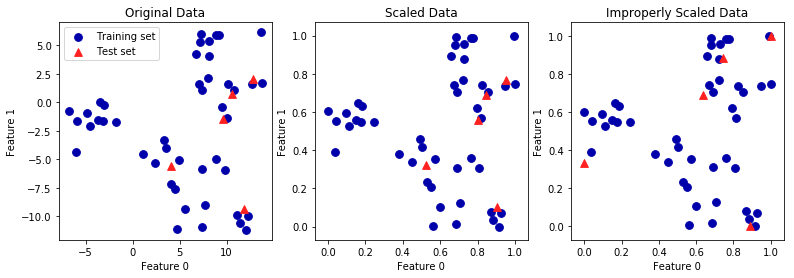

In [5]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# 构造数据
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 将其分为训练集和测试集
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 绘制训练集和测试集
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# 利用MinMaxScaler缩放数据
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 将正确缩放的数据可视化
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], 
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], 
                marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# 单独对测试集进行缩放
# 使得测试集的最小值为0，最大值为1
# 千万不要这么做！这里只是为了举例
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 将错误缩放的数据可视化
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], 
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], 
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
plt.show()

第一张图是未缩放的二维数据集，其中训练集用圆形表示，测试集用三角形表示。

第二张图中是同样的数据，但使用`MinMaxScaler`缩放。这里我们调用`fit`作用在训练集上，然后调用`transform`作用在训练集和测试集上。第二张图中的数据集看起来与第一张图中的完全相同，只是坐标轴刻度发生了变化，所有特征都位于0~1，测试数据的特征最大值和最小值并不是1和0。

第三张图展示了如果我们对训练集和测试集分别进行缩放会发生什么。在这种情况下，对训练集和测试集而言，特征的最大值和最小值都是1和0。但现在数据集看起来不一样。测试集相对训练集的移动不一致，因为它们分别做了不同的缩放。我们随意改变了数据的排列。这显然不是我们想要做的事情。

> 通常来说，你想要在某个数据集上`fit`一个模型，然后再将其`transform`。这是一个非常常见的任务，通常可以用比先调用`fit`再调用`transform`更高效的方法来计算。对于这种使用场景，所有具有`transform`方法的模型也都具有一个`fit_transform`方法。下面是使用 StandardScaler 的一个例子：

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 依次调用fit和transform（使用方法链）
X_scaled = scaler.fit(X).transform(X)
# 结果相同，但计算更加高效
X_scaled_d = scaler.fit_transform(X)

虽然`fit_transform`不一定对所有模型都更加高效，但在尝试变换训练集时，使用这一方法仍然是很好的做法。

### 3.3.4 预处理对监督学习的作用
我们在`cancer数据集`上使用`MinMaxScaler`观察数据预处理对SVC的作用。首先在原始数据上拟合SVC：

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


使用`MinMaxScaler`对数据进行缩放后再拟合SVC：

In [8]:
# 使用0-1缩放进行预处理
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 在缩放后的训练数据上学习SVM
svm.fit(X_train_scaled, y_train)

# 在缩放后的测试集上计算分数
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


使用`StandardScaler`对数据进行缩放后再拟合SVC：

In [9]:
# 利用零均值和单位方差的缩放方法进行预处理
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 在缩放后的训练数据上学习SVM
svm.fit(X_train_scaled, y_train)

# 在缩放后的测试集上计算分数
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96
